# HW1

## Task 1.1 (0.5 points)

Show that cosine distance between two vectors is always between $0$ and $2$. 

### YOUR SOLUTION HERE
Angle $\theta$ between two nonzero vectors $x$ and $y$ is defined from equality $\cos \theta = \frac{\langle  x, y \rangle}{\Vert  x\Vert_2 \cdot \Vert  y\Vert_2}.$ The angle is well-defined since this fraction is always between $-1$ and $1$ due to the Cauchy-Schwarz inequality. Therefore cosine dictance, which equal to $1-\cos\theta$,  between two vectors is always between $1 - 1 = 0$ and $1 -(-1) = -2$.


## Task 1.2 (1 point)

Let $\boldsymbol A \in\mathbb R^{m\times n}$, $\boldsymbol B \in\mathbb R^{n\times m}$. Prove that $\mathrm{tr}(\boldsymbol{AB}) = \mathrm{tr}(\boldsymbol{BA})$. Using this property, calculate $\mathrm{tr}(\boldsymbol{uv}^\mathsf{T})$ if $\boldsymbol u, \boldsymbol v \in\mathbb R^n$, $\boldsymbol u \perp \boldsymbol v$.

### YOUR SOLUTION HERE
A) $$ C = AB$$
$$ \mathrm{tr}( C) = \sum\limits_{i=1}^n C_{ii}$$
$$C_{ik} = \sum\limits_{j=1}^n A_{ij}B_{jk},\quad 1\leqslant i \leqslant m, \quad 1\leqslant k \leqslant m . \quad  A \in\mathbb R^{m\times n}, \quad B \in\mathbb R^{n\times m}.$$
$$C_{ii} = \sum\limits_{j=1}^n A_{ij}B_{ji}$$

$$ \mathrm{tr}(AB) = \mathrm{tr}(C) = \sum\limits_{i=1}^n C_{ii} = \sum\limits_{i=1}^n \sum\limits_{j=1}^n A_{ij}B_{ji} $$
$$ \mathrm{tr}(BA) = \sum\limits_{i=1}^n \sum\limits_{j=1}^n B_{ij}A_{ji} $$

$\sum\limits_{i=1}^n \sum\limits_{j=1}^n B_{ij}A_{ji} = \sum\limits_{i=1}^n \sum\limits_{j=1}^n A_{ij}B_{ji}$ Because they have  the same iteration values. Therefore, $\mathrm{tr}(AB) = \mathrm{tr}(BA) $ (1)

B) Using the property 1 we have:
$\mathrm{tr}(\boldsymbol {uv}^\mathsf{T}) = \sum\limits_{i=1}^n u_i v_i = \boldsymbol v^\mathsf{T} \boldsymbol u = \mathrm{tr}(\boldsymbol v^\mathsf{T} \boldsymbol u).$ and because the vectors are orthogonal: $\langle\boldsymbol x, \boldsymbol y \rangle = 0.$ Therefore $\mathrm{tr}(\boldsymbol {uv}^\mathsf{T}) = 0$

## Task 1.3 (0.5 points)

A **permutation matrix** $\boldsymbol P$ is obtained from the identity matrix $\boldsymbol I$ by some permutation of rows (or columns). Show that $\boldsymbol P^{-1} = \boldsymbol P^\mathsf{T}$.

### YOUR SOLUTION HERE
Multiply both parts by P
$$ P^{-1}P = P^\mathsf{T}P = I$$

$P^\mathsf{T}P = I$ if $P$ is **orthogonal**. Because $\langle \boldsymbol q_i, \boldsymbol q_j\rangle = \left\{\begin{array}{ll} 0, i \neq j \\ 1,  i = j \end{array} \right.$ And when we multiply matrices, we find the dot products of rows and columns, thereby obtaining an identity matrix because 1 * 1 = 1 and 0 * 0 = 0. Our matrix P is orthogonal because when $i = j$ we have $\langle \boldsymbol q_i, \boldsymbol q_j\rangle = 1$ , i.e each column and row have one 1. And otherwise, when $i \neq j$ we have  $\langle \boldsymbol q_i, \boldsymbol q_j\rangle = 0$.

$$P^\mathsf{T}P = I = P^{-1}P $$


## Task 1.4 (1 point)

Let $\boldsymbol A \in \mathbb R^{m\times n}$. Prove that $N(\boldsymbol A) = N(\boldsymbol A^{\mathsf T}\boldsymbol A)$.

### YOUR SOLUTION HERE

Let $x \in N(A)$. 
$$Ax = 0$$
$$ A^{\mathsf T}Ax = 0$$
$$x \in N(A^{\mathsf T}A)$$

Trerefore, $N(A) \subseteq N(A^{\mathsf T}A)$.

$$ A^{\mathsf T}Ax = 0$$
$$ x^{\mathsf T}A^{\mathsf T}Ax = 0$$
$$ (Ax)^{\mathsf T}Ax = 0$$
$$Ax = 0$$
$$x \in N(A)$$

Hence, $ N(A^{\mathsf T}A) \subseteq N(A)$, therefore $ N(A^{\mathsf T}A) = N(A)$

## Task 1.5 (programming, 2 points)

Compare the performance of matrix multiplication 

$$
       \boldsymbol C = \boldsymbol {AB}, \quad \boldsymbol A \in \mathbb R^{m\times n}, \quad \boldsymbol B \in \mathbb R^{n\times p}.
$$

Try the following methods:

* nested pythonic loop implementing the formula $C_{ik} = \sum\limits_{j=1}^n A_{ij}B_{jk}$
* replace the inner `for` loop by `np.dot` for calculating $\boldsymbol a_i^\top \boldsymbol b_k$
* calculate $\sum\limits_{j=1}^n \boldsymbol a_j \boldsymbol b_j^\top$ (use [np.outer](https://numpy.org/doc/stable/reference/generated/numpy.outer.html))
* just use numpy and calculate `A @ B`

The plan (see aslo dot product demo below):

* implement these four functions
* test that they return the same result
* measure their performance on a square matrix of shape $100\times 100$
* plot graphs of the execution time versus $n$

In [62]:
import numpy as np


def RaiseError(B, m):
    if len(B) != m:
            raise ValueError("Number of columns in A must be equal to number of rows in B.")
            
def mat_mul_loop(A, B: np.array) -> np.array:
    n = len(A)
    m = len(A[0])
    p = len(B[0])
    
    RaiseError(B,m)
    
    C = np.zeros([n,p])

    for i in range(n):
            for k in range(p):
                for j in range(m):
                    C[i][k] += A[i][j] * B[j][k]
    return C

def mat_mul_inner(A, B: np.array) -> np.array:
    n = len(A)
    m = len(A[0])
    p = len(B[0])

    RaiseError(B,m)

    C = np.zeros([n,p])

    for i in range(n):
            for k in range(p):
                C[i][k] = np.dot(A[i], B.T[k])
                
    return C

def mat_mul_outer(A, B: np.array) -> np.array:
    n = len(A)
    m = len(A[0])
    p = len(B[0])

    RaiseError(B,m)

    C = np.zeros([n,p])

    for i in range(m):
        C += np.outer(A.T[i], B[i])
            
    return C

def mat_mul_np(A, B: np.array) -> np.array:
    m = len(A[0])

    RaiseError(B,m)

    return A@B
    

In [63]:
# TESTING AREA

def TestMatrices(n_max):
    for n in range(1, n_max):
        m = np.random.randint(1, n_max)
        p = np.random.randint(1, n_max)
        A = np.random.randn(m, n)
        B = np.random.randn(n, p)
        prod_loop = mat_mul_loop(A, B)
        prod_inner = mat_mul_inner(A, B)
        prod_outer = mat_mul_outer(A, B)
        prod_np = mat_mul_np(A, B)
        assert np.allclose(prod_loop, prod_inner)
        assert np.allclose(prod_loop, prod_np)
        assert np.allclose(prod_loop, prod_outer)
        
        
TestMatrices(100)    

Measure performance on two square matrices:

In [53]:
n = 100
A = np.random.randn(n, n)
B = np.random.randn(n, n)

In [64]:
import timeit


time_taken_for_mat_mul_loop = timeit.timeit(lambda: mat_mul_loop(A, B), number=10)
print("Result of mat_mul_loop function:")
print(mat_mul_loop(A, B))
print("\nTime taken for 10 iterations: {:.6f} seconds".format(time_taken_for_mat_mul_loop))

time_taken_for_mat_mul_inner = timeit.timeit(lambda: mat_mul_inner(A, B), number=10)
print("\nResult of mat_mul_inner function:")
print(mat_mul_inner(A, B))
print("\nTime taken for 10 iterations: {:.6f} seconds".format(time_taken_for_mat_mul_inner))

time_taken_for_mat_mul_outer = timeit.timeit(lambda: mat_mul_outer(A, B), number=10)
print("\nResult of mat_mul_outer function:")
print(mat_mul_outer(A, B))
print("\nTime taken for 10 iterations: {:.6f} seconds".format(time_taken_for_mat_mul_outer))

time_taken_mat_mul_np = timeit.timeit(lambda: mat_mul_np(A, B), number=10)
print("\nResult of mat_mul_np function:")
print(mat_mul_np(A, B))
print("\nTime taken for 10 iterations: {:.6f} seconds".format(time_taken_mat_mul_np))



Result of mat_mul_loop function:
[[ -2.77954611  14.42118232  11.27583971 ...   1.86592845   7.07813758
    4.9281373 ]
 [  4.34000566  11.19106215   6.33464601 ...   3.83221215  -4.92998168
   -1.95229932]
 [ 10.71647094 -16.95743939  -3.08468998 ...   0.12186375  -2.58592892
   -1.77790918]
 ...
 [ -1.84411041  10.59318982  -4.47785887 ...  -6.55359752  10.52455107
   10.28011147]
 [  4.43822073   1.63955851  23.76032418 ... -14.82443057   2.81379348
   11.49017224]
 [  5.76406363  13.23599147  14.83900169 ...   2.56868836   1.91057476
   -5.94205468]]

Time taken for 10 iterations: 24.599616 seconds

Result of mat_mul_inner function:
[[ -2.77954611  14.42118232  11.27583971 ...   1.86592845   7.07813758
    4.9281373 ]
 [  4.34000566  11.19106215   6.33464601 ...   3.83221215  -4.92998168
   -1.95229932]
 [ 10.71647094 -16.95743939  -3.08468998 ...   0.12186375  -2.58592892
   -1.77790918]
 ...
 [ -1.84411041  10.59318982  -4.47785887 ...  -6.55359752  10.52455107
   10.28011147]
 [

Plot the graphs:

In [57]:
import matplotlib.pyplot as plt
from time import time

%config InlineBackend.figure_format = 'svg'

def measure_time(func, m, n, p, n_samples=10):
    result = np.zeros(n_samples)
    for i in range(n_samples):
        begin = time()
        func(np.random.randn(m, n), np.random.randn(n, p))
        result[i] = time() - begin
    return result.mean()

def get_times_lists(func, step=10, max_size=200, n_samples=20):
    times = []
    sizes = np.arange(step, max_size + 1, step)
    for size in sizes:
        times.append(measure_time(func, size, size, size, n_samples))
    return np.array(times)

def plot_time_vs_size(step=10, max_size=100, n_samples=20):
    loop_times = 1000*get_times_lists(mat_mul_loop, step, max_size, n_samples)
    inner_times = 1000*get_times_lists(mat_mul_inner, step, max_size, n_samples)
    outer_times = 1000*get_times_lists(mat_mul_outer, step, max_size, n_samples)
    np_times = 1000*get_times_lists(mat_mul_np, step, max_size, n_samples)
    sizes = np.arange(step, max_size + 1, step)
    plt.semilogy(sizes, loop_times, c='r', lw=2, label="loop")
    plt.semilogy(sizes, inner_times, c='b', lw=2, label="inner")
    plt.semilogy(sizes, outer_times, c='g', lw=2, label="outer")
    plt.semilogy(sizes, np_times, c='m', lw=2, label="np")
    plt.xlim(0, max_size)
    plt.title("Matrix product")
    plt.legend()
    plt.xlabel("size")
    plt.ylabel("time, ms")
    plt.grid(ls=":");

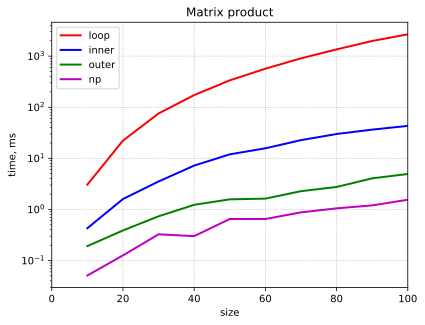

In [60]:
plot_time_vs_size()
plt.show()

In this work, we focused on analyzing and comparing the performance of matrix multiplication using various approaches: manual loop, dot product through matrix transportation, outer product and the built-in NumPy function. As a result of the comparison, the results showed that the built-in Numpy function has the best performance with large matrix sizes, and the manual loop has the worst performance. Having depicted the results by Matplotlib, this correlation between the method of matrix production and the size of the matrix was shown on the graph, clear differences and advantages of the built-in function were highlighted.

## Demo for task 1.5: dot product performance

Compare several implementations of the dot product.

In [65]:
import numpy as np

def dot_loop(a, b):
    result = 0
    for i in range(len(a)):
        result += a[i] * b[i]
    return result

def dot_sum(a, b):
    return sum(a * b)

def dot_np(a, b):
    return a @ b

Test that all this functions produce the same result:

In [66]:
for n in range(1, 101):
    a = np.random.randn(n)
    b = np.random.randn(n)
    assert np.allclose(dot_loop(a, b), dot_sum(a, b))
    assert np.allclose(dot_loop(a, b), dot_np(a, b))
    assert np.allclose(dot_np(a, b), dot_sum(a, b))

Measure performance:

In [67]:
n = 1000
a = np.random.randn(n)
b = np.random.randn(n)

In [68]:
%%timeit
dot_loop(a, b)

1.03 ms ± 26.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [8]:
%%timeit
dot_sum(a, b)

111 µs ± 12 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [7]:
%%timeit
dot_np(a, b)

2.33 µs ± 466 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


This is why you should almost always prefer `numpy` to pythonic loops! To emphasize this effect, plot the graphs of execution time versus array size.

In [22]:
import matplotlib.pyplot as plt
from time import time

%config InlineBackend.figure_format = 'svg'

def measure_time(func, size, n_samples=10):
    result = np.zeros(n_samples)
    for i in range(n_samples):
        begin = time()
        func(np.random.randn(size), np.random.randn(size))
        result[i] = time() - begin
    return result.mean()

def get_times_lists(func, step=20, max_size=1000, n_samples=20):
    times = []
    sizes = np.arange(20, max_size + 1, 20)
    for size in sizes:
        times.append(measure_time(func, size, n_samples))
    return np.array(times)

def plot_time_vs_size(step=20, max_size=1000, n_samples=50):
    loop_times = 1000*get_times_lists(dot_loop, step, max_size, n_samples)
    sum_times = 1000*get_times_lists(dot_sum, step, max_size, n_samples)
    np_times = 1000*get_times_lists(dot_np, step, max_size, n_samples)
    sizes = np.arange(step, max_size + 1, step)
    plt.plot(sizes, loop_times, c='r', lw=2, label="loop")
    plt.plot(sizes, sum_times, c='b', lw=2, label="sum")
    plt.plot(sizes, np_times, c='g', lw=2, label="np")
    plt.xlim(0, max_size)
    plt.title("Dot product")
    plt.legend()
    plt.xlabel("size")
    plt.ylabel("time, ms")
    plt.grid(ls=":");

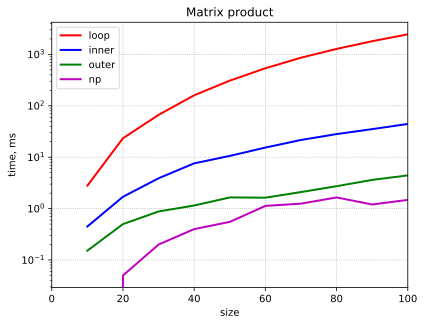

In [69]:
plot_time_vs_size()
plt.show()